See wiki page: https://wiki.cosmos.esa.int/planckpla2015/index.php/Main_Page

Links for masks:
http://irsa.ipac.caltech.edu/data/Planck/release_2/ancillary-data/previews/HFI_Mask_PointSrc_2048_R2.00/header.txt
http://irsa.ipac.caltech.edu/data/Planck/release_2/ancillary-data/previews/HFI_Mask_GalPlane-apo5_2048_R2.00/header.txt

SZ Source Catalog: 
https://wiki.cosmos.esa.int/planckpla2015/index.php/Catalogues#.282015.29_Second_SZ_Catalogue

Format: Healpix format, with Nside of 1024 (LFI 30, 44 and 70) and 2048 (LFI 70 and HFI), in Galactic coordinates, and Nested ordering. 

# Reading a polarization map at 100 GHz

In [1]:
path = "/Users/inchani/Desktop/UC\ Davis/My\ Courses/STA\ 250\ (AstroStatistics)/Project/"; 
map_name = "HFI_SkyMap_100_2048_R2.02_full.fits"; # Polarization map at 100 GHz
using PyCall, PyPlot
@pyimport healpy as hp
dθ = dϕ = 0.0007669903939429012;  # 5 arcmin of resolution to radian
NSIDE = 2048;
Nested = false;
I_STOKES = hp.read_map("$path$map_name", field = 0, memmap = true);
dim = length(I_STOKES);

NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


/Users/inchani/.local/lib/python2.7/site-packages/healpy/fitsfunc.py:335: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  "assume {}".format(schm))


In [ ]:
Q_STOKES = hp.read_map("$path$map_name", field = 1, memmap = true);
U_STOKES = hp.read_map("$path$map_name", field = 2, memmap = true);

Each fits file contains:

Field 0  = I_STOKES, the intensity in each specific band 
Field 1  = Q_STOKES, the polarized brightness 
Field 2  = U_STOKES,        
Field 3  = HITS    , the number of observations 
Field 4  = II_COV  , the variance in the corresponding Stokes parameter 
Field 5  = IQ_COV          
Field 6  = IU_COV  , the covariance inbetween the corresponding Stokes parameter  
Field 7  = QQ_COV  
Field 8  = QU_COV  
Field 9  = UU_COV 

# Also read mask maps
In a galactic mask map, I ruled out " mask value = 0" pixels in 70% coverage case

In [2]:
GalMapFile = "HFI_Mask_GalPlane-apo5_2048_R2.00.fits"
PtMapFile  = "HFI_Mask_PointSrc_2048_R2.00.fits"
GalMap     = hp.read_map("$path$GalMapFile", field = 3, memmap = true); # 70% sky coverage 
PtMap      = hp.read_map("$path$PtMapFile", field = 0, memmap = true);  

NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


(Ordering converted to RING)

# Intensity of all-sky map before masking

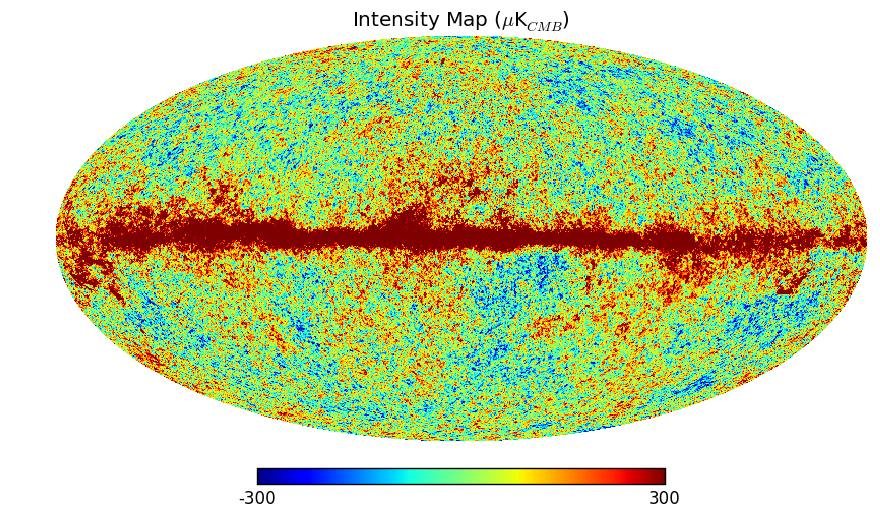

In [6]:
hp.mollview(I_STOKES*1e6, xsize = 800, title = "Intensity Map (\$\\mu\$\K\$\_{CMB}\$\)", min = -300, max = 300)

masking galactic foregrounds and point sources

In [3]:
planck_map = copy(I_STOKES)
cnt = 0
for i = 1:max(length(GalMap),length(PtMap))
    if (GalMap[i] == 0.) | (PtMap[i] == 0.)
        planck_map[i] = hp.UNSEEN
        #planck_map[i] = 0.        # setting masked pixel = 0. 
        cnt += 1
    end
end

# Intensity of all-sky map after masking

/Users/inchani/python/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


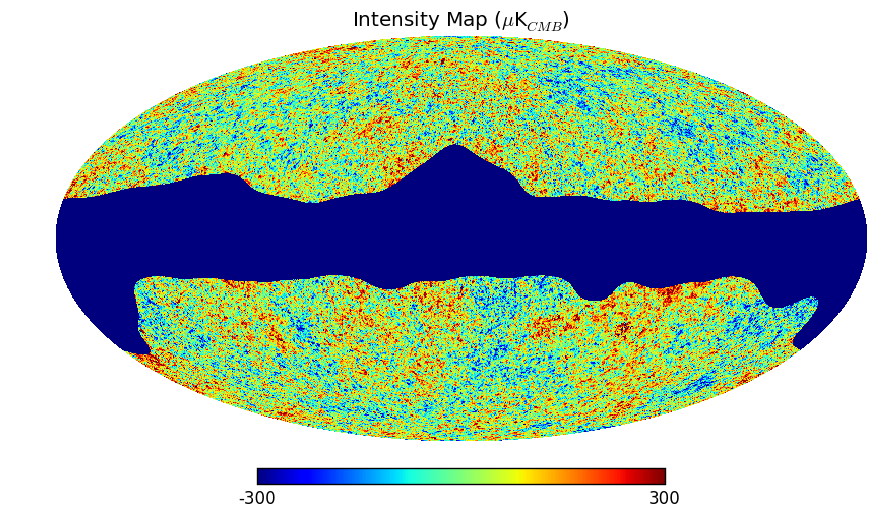

In [4]:
hp.mollview(planck_map*1e6, xsize = 800, title = "Intensity Map (\$\\mu\$\K\$\_{CMB}\$\)", min = -300, max = 300)

# Loading SZ source (Cluster Source)

hdulist = hdulist[Table Type][obj index]

TTYPE1  = 'INDEX   '                                                            
TFORM1  = 'I       '                                                            
TUNIT1  = 'None    '                                                            
TTYPE2  = 'NAME    '                                                            
TFORM2  = '18A     '                                                            
TUNIT2  = 'None    '                                                            
TTYPE3  = 'GLON    '                                                            
TFORM3  = 'D       '                                                            
TUNIT3  = 'degrees '                                                            
TTYPE4  = 'GLAT    ' 
TFORM4  = 'D       '                                                            
TUNIT4  = 'degrees '
TTYPE19 = 'REDSHIFT'                                                            
TFORM19 = 'E       '                                                            
TUNIT19 = 'None    ' 
TTYPE20 = 'MSZ     ' 
TFORM20 = 'E       '                                                            
TUNIT20 = '10^14 Msol' 


(Index starts with 1)

@pyimport healpy.pixelfunc as pixelfunc
ind = 0
l,b     = pixelfunc.pix2ang(2048,ind,nest=false)   # pixel index > Spherical Coord, [θ, ϕ] [radian unit]
ind_rtn = pixelfunc.ang2pix(2048,l,b,nest=false)   # Spherical Coord, [θ, ϕ]> pixel index
Note: ϕ = 0 (θ=90 deg) is toward galactic center > need to convert coordinates of SZ sources
      increasing ϕ = moving East, increasing θ = moving South

In [3]:
SZsource = "HFI_PCCS_SZ-union_R2.08.fits";
@pyimport healpy.fitsfunc as fitsfunc;
@pyimport healpy.pixelfunc as pixelfunc;
hdulist = fitsfunc.mrdfits("$path$SZsource",hdu=1);   #  load HDU table #1
ind = sortperm(hdulist[20][:],rev=true);              #  return indices of ojects in decreasing order of total mass

1653-element Array{Int64,1}:
   23
 1341
 1232
  931
  307
  837
 1627
 1322
 1526
  862
  807
  758
 1412
    ⋮
 1608
 1611
 1621
 1626
 1628
 1633
 1636
 1640
 1643
 1648
 1652
 1653

# Function to return pixel indices using coordinates of superclusters

In [4]:
function SpheCoord2Index(θmin::Float64,θmax::Float64,ϕmin::Float64,ϕmax::Float64)
   
    #θmax > 1pi ? θmax = pi : θmax = θmax
    #θmin < 0.  ? θmin = 0. : θmin = θmin
    
    index = Array(Int64,0)
    
    if (θmax > 160pi / 180) | (θmin < 10pi / 180) 
        println("   |> Too high or low latitude... exit")
        return 0, index
    end

    
    θ = copy(θmax)
    Nθpix = 0; Nϕpix = 0; Ntot = 0
    
    Nϕpix1 = pixelfunc.ang2pix(NSIDE,θmax,ϕmax) - pixelfunc.ang2pix(NSIDE,θmax,ϕmin)
    Nϕpix2 = pixelfunc.ang2pix(NSIDE,θmin,ϕmax) - pixelfunc.ang2pix(NSIDE,θmin,ϕmin)

    i   = pixelfunc.get_all_neighbours(NSIDE,θmax,ϕmax)[6]
    l,b = pixelfunc.pix2ang(NSIDE,i)
    dϕ  = b - ϕmax
    Nϕ  = (ϕmax - ϕmin) / dϕ
    
    #println("   |> $θmin, $θmax, $ϕmin, $ϕmax, Nϕ = $Nϕ")
    println("   |> dϕ = $dϕ,  Nϕ = $Nϕ")
    if Nϕ < 1.
        println("   |> Poor resolution... exit")
        return 0, index
    end
    

    
    
    if (Nϕpix1 > 0) & (Nϕpix2 > 0)
        Nϕpix = min(Nϕpix1,Nϕpix2)
        if Nϕpix / Nϕ > 1.5 
            Nϕpix = -1
        end
    else
        Nϕpix = -1
    end

    
    if ((ϕmax > 2pi) | (ϕmin * ϕmax < 0)) 
        Nϕpix = pixelfunc.ang2pix(NSIDE,θmax,ϕmax) - pixelfunc.ang2pix(NSIDE,θmax,ϕmin)        
        N = 1; ϕ = ϕmax;    
        while (ϕ > 0.)
            i1 = pixelfunc.ang2pix(NSIDE,θmax,ϕ)
            i2 = pixelfunc.get_all_neighbours(NSIDE,θmax,ϕ)[2]
            N += 1
            l, ϕ = pixelfunc.pix2ang(NSIDE,i2)       
            if ϕ > ϕmax
                ϕ -= 2pi
            end
        end           
        N2 = copy(N-1)       
        N = 1; ϕ = 0.;
        
        while (ϕ > ϕmin)
            i1 = pixelfunc.ang2pix(NSIDE,θmax,ϕ)
            i2 = pixelfunc.get_all_neighbours(NSIDE,θmax,ϕ)[2]
            N += 1
            l, ϕ = pixelfunc.pix2ang(NSIDE,i2)
            if ϕ > 0.
                ϕ -= 2pi
            end
        end
        N1 = copy(N-1) 
        while θ >= θmin
            ϕ = ϕmin;
            ist1 = pixelfunc.ang2pix(NSIDE,θ,ϕ)
            ist2 = pixelfunc.get_all_neighbours(NSIDE,θ,ϕ)[3] # Again Pixels on North West to fully cover area.
            ind1 = Int64[i for i=ist1+1:ist1+N1]            
            ind2 = Int64[i for i=ist2+1:ist2+N1]

            index = vcat(index,ind1,ind2)                    
            ϕ = ϕmax;
            ist1 = pixelfunc.ang2pix(NSIDE,θ,ϕ)
            ist2 = pixelfunc.get_all_neighbours(NSIDE,θ,ϕ)[3] # Again Pixels on North West to fully cover area.
            ind1 = Int64[i for i=ist1-N2:ist1-1]            
            ind2 = Int64[i for i=ist2-N2:ist2-1]            
            
            index = vcat(index,ind1,ind2)        
            i = pixelfunc.get_all_neighbours(NSIDE,θ,ϕ)[4]
            θ, b = pixelfunc.pix2ang(NSIDE,i) 
            Nθpix += 2
        end
        Nϕpix = N1 + N2
        if abs( (Nϕpix-Nϕ)/Nϕ ) > 0.5
            println("   |> Found a huge discrepancy btwn Nϕpix($Nϕpix) and Nϕ... exit")
            return 0, index
        end
        println("   |> Scheme No.1 & returning ($N1+$N2=$Nϕpix, $Nθpix) array")
        return length(index), index
    end
    
    if Nϕpix < 0        
        N = 1; dind = 1;
        ϕ = ϕmin
        while (dind == 1) & (ϕ < ϕmax)
            i1 = pixelfunc.ang2pix(NSIDE,θmax,ϕ)
            i2 = pixelfunc.get_all_neighbours(NSIDE,θmax,ϕ)[6]
            dind = i2 - i1
            if dind > 0
                N += 1
            end
            l, ϕ = pixelfunc.pix2ang(NSIDE,i2)
        end           
        N1 = copy(N)
        #println("ϕ starting at $ϕ")
        N = 1; dind = 1;
        while (dind == 1) & (ϕ < ϕmax)
            i1 = pixelfunc.ang2pix(NSIDE,θmax,ϕ)
            i2 = pixelfunc.get_all_neighbours(NSIDE,θmax,ϕ)[2]
            dind = i1 - i2
            if dind > 0
                N += 1
            end
            l, ϕ = pixelfunc.pix2ang(NSIDE,i2)
        end
        #println("ϕ ending at $ϕ")        
        N2 = copy(N)
        while θ >= θmin
            ϕ = ϕmin;
            ist1 = pixelfunc.ang2pix(NSIDE,θ,ϕ)
            ist2 = pixelfunc.get_all_neighbours(NSIDE,θ,ϕ)[3] # Again Pixels on North West to fully cover area.
            ind1 = Int64[i for i=ist1+1:ist1+N1]            
            ind2 = Int64[i for i=ist2+1:ist2+N1]

            index = vcat(index,ind1,ind2)        
            #(SW, W, NW, N, NE, E, SE and S )
            
            ϕ = ϕmax;
            ist1 = pixelfunc.ang2pix(NSIDE,θ,ϕ)
            ist2 = pixelfunc.get_all_neighbours(NSIDE,θ,ϕ)[3] # Again Pixels on North West to fully cover area.
            ind1 = Int64[i for i=ist1-N2:ist1-1]            
            ind2 = Int64[i for i=ist2-N2:ist2-1]            
            
            index = vcat(index,ind1,ind2)        
            i = pixelfunc.get_all_neighbours(NSIDE,θ,ϕ)[4]
            θ, b = pixelfunc.pix2ang(NSIDE,i) 
            Nθpix += 2
        end
        Nϕpix = N1 + N2
        if abs( (Nϕpix-Nϕ)/Nϕ ) > 0.5
            println("   |> Found a huge discrepancy btwn Nϕpix($Nϕpix) and Nϕ... exit")
            return 0, index
        end        
        println("   |> Scheme No.2 & returning ($N1+$N2=$Nϕpix, $Nθpix) array")        
        return length(index), index

    end    
     
    while θ > θmin
        ϕ = ϕmin;
        ist1 = pixelfunc.ang2pix(NSIDE,θ,ϕ)
        ist2 = pixelfunc.get_all_neighbours(NSIDE,θ,ϕ)[3] # Again Pixels on North West to fully cover area.
        ind1 = Int64[i for i=ist1:ist1+Nϕpix-1]            
        ind2 = Int64[i for i=ist2:ist2+Nϕpix-1]
        
        index = vcat(index,ind1,ind2)        
        #(SW, W, NW, N, NE, E, SE and S )
        i = pixelfunc.get_all_neighbours(NSIDE,θ,ϕ)[4]
        θ, b = pixelfunc.pix2ang(NSIDE,i) 
        Nθpix += 2
    end
    println("   |> Scheme No.3 & returning ($Nϕpix, $Nθpix) array")        
    
    return length(index), index
end

SpheCoord2Index (generic function with 1 method)

In [30]:
#dtheta = 15. / 360 * 2pi; # 15 degrees in radian
#Nϕ, Nθ, index = SpheCoord2Index(0.3pi,0.3pi+dtheta,50dϕ,50dϕ+dtheta);
#planck_map = copy(I_STOKES)
#cnt = 0
#for i = 1:length(index)
#    planck_map[index[i]] = hp.UNSEEN
#end
#hp.mollview(planck_map*1e6, xsize = 800, title = "Intensity Map (\$\\mu\$\K\$\_{CMB}\$\)", min = -300, max = 300)

In [5]:
CoordSCluster = Array(Float64, length(ind), 2) # Center of Clusters in [θ, ϕ] in radian
for i = 1:length(ind)
    CoordSCluster[i,1] = pi*0.5 - hdulist[4][ind[i]]* pi / 180
    CoordSCluster[i,2] = hdulist[3][ind[i]] * pi / 180
end
dtheta = 10. / 180 * pi; # 15 degrees in radian

0.17453292519943295

In [6]:
planck_map = copy(I_STOKES);
#for i = 1: max(length(GalMap),length(PtMap))
#    if (GalMap[i] == 0.) | (PtMap[i] == 0.)
#        planck_map[i] = 0.                  # setting masked pixel = 0. 
#    end
#end

50331648-element Array{Float64,1}:
 -0.000122385
 -9.95854e-5 
 -3.97362e-5 
 -8.64177e-5 
 -6.31121e-5 
 -0.000117532
 -0.000119711
 -5.01412e-5 
 -6.03818e-5 
 -1.62597e-5 
 -0.000137699
 -0.000110545
 -0.000100209
  ⋮          
  7.91862e-5 
  1.71163e-7 
  7.46492e-5 
  0.000135327
  0.00015983 
  0.000133309
  5.96356e-5 
  4.71951e-5 
  0.000129426
  0.000111708
  5.10435e-5 
 -2.07038e-6 

In [7]:
i_sc_pixel  = Array(Int64, 0)     # a list of pixel indices of a supercluster 
id_sc       = Array(Int64, 0)     # survived index of CoordSCluster after sorting out bad samples
N_sc        = Array(Int64, 0)     # number of pixels in a region
println("---| Start clipping regions of superclusters: 20 deg x 20 deg (10 deg = $dtheta radian)")
for i = 1:60
    l, b = CoordSCluster[i,:]
    println("No. $i with angular position, (θ,ϕ) = ($l, $b)")
    N, ind = SpheCoord2Index(CoordSCluster[i,1]-dtheta,CoordSCluster[i,1]+dtheta,
    CoordSCluster[i,2]-dtheta,CoordSCluster[i,2]+dtheta)   
    if N > 0 
        planck_map[ind] = hp.UNSEEN
        id_sc           = vcat(id_sc, i)
        N_sc            = vcat(N_sc, N)
        i_sc_pixel      = vcat(i_sc_pixel, ind)
        println("   |> total N = $N")
    end
    
end

---| Start clipping regions of superclusters: 20 deg x 20 deg (10 deg = 0.17453292519943295 radian)
No. 1 with angular position, (θ,ϕ) = (1.0392731428146362, 0.11812938004732132)
   |> dϕ = 0.0007115204363745686,  Nϕ = 490.5914609810389
   |> Scheme No.1 & returning (74+382=456, 920) array
   |> total N = 419520
No. 2 with angular position, (θ,ϕ) = (0.9965339681894375, 5.008899532434171)
   |> dϕ = 0.0006556150259200422,  Nϕ = 532.4250308464361
   |> Scheme No.3 & returning (455, 898) array
   |> total N = 408590
No. 3 with angular position, (θ,ϕ) = (1.941690861288111, 4.643287098918019)
   |> dϕ = 0.0007971258283188121,  Nϕ = 437.90558277990704
   |> Scheme No.3 & returning (455, 996) array
   |> total N = 453180
No. 4 with angular position, (θ,ϕ) = (2.2595401967704087, 3.5942820979547023)
   |> dϕ = 0.0008248664512340298,  Nϕ = 423.17862470543014
   |> Scheme No.3 & returning (455, 848) array
   |> total N = 385840
No. 5 with angular position, (θ,ϕ) = (0.8470749161514017, 1.267574540

# Clipped masks of spuercluster regions on the CMB map

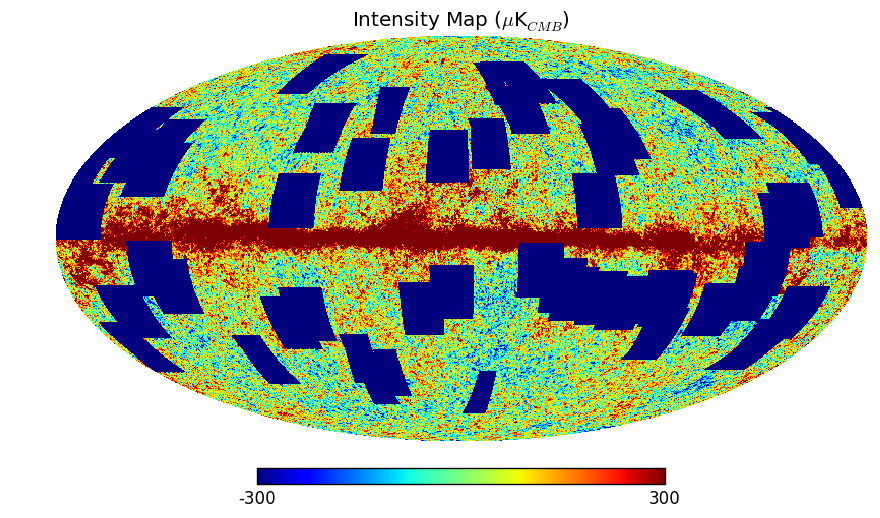

In [13]:
hp.mollview(planck_map*1e6, xsize = 800, title = "Intensity Map (\$\\mu\$\K\$\_{CMB}\$\)", min = -300, max = 300)

In [49]:
const FWHM    = 9.68 / 60. * pi / 180;   # 9.68 arcmin to radian unit (See Planck 2015 I paper)
const σ       = FWHM / √(2log(2))
const σnorm2  = 2.*σ^2.
const σlim2   = (3σ)^2.  
function GKernel(x::Float64,y::Float64,x₀::Float64,y₀::Float64)
    r2 = (x-x₀)^2. + (y-y₀)^2.
    if r2 < σlim2
        return exp( -r2 / σnorm2 )
    else
        return 0.
    end
end

GKernel (generic function with 1 method)

In [105]:
const angsize    = 20.                   # width and height in degree 
const XYsize     = angsize * pi / 180;   # in radian 
Nsize            = 150;
res              = XYsize / Nsize;

In [106]:
function ShiftArray(X::Array{Float64,2},drow::Int64,dcol::Int64)
    Nrow  = Int(size(X)[1] / 2)
    Ncol  = Int(size(X)[2] / 2)
    rtn   = zeros(size(X)[1], size(X)[2]) 
    
    if (drow >= 0) & (dcol >= 0)
        rtn[1+drow:2Nrow,1+dcol:2Ncol] = X[1:2Nrow-drow,1:2Ncol-dcol]
        return rtn
    end
    
    if (drow <= 0) & (dcol <= 0)
        rtn[1:2Nrow+drow,1:2Ncol+dcol] = X[1-drow:2Nrow,1-dcol:2Ncol] 
        return rtn
    end
    
    if (drow >= 0) & (dcol < 0)
        rtn[1+drow:2Nrow,1:2Ncol+dcol] = X[1:2Nrow-drow,1-dcol:2Ncol] 
        return rtn
    end
    
    if (drow < 0) & (dcol >= 0)
        rtn[1:2Nrow+drow,1+dcol:2Ncol] = X[1-drow:2Nrow,1:2Ncol-dcol] 
        return rtn
    end     
end

ShiftArray (generic function with 1 method)

In [107]:
x1d      = linspace(-XYsize*0.5,XYsize*0.5,Nsize)
y1d      = linspace(XYsize*0.5,-XYsize*0.5,Nsize)
Tmap     = Float64[ GKernel(xi,yi,0.,0.) for xi in x1d, yi in y1d];
TmapNorm =  sum(Tmap);
Tmap    /= TmapNorm;

# Gaussian Kernel (2-dim) with FHWM of 9.68 arcmin at 100 GHz

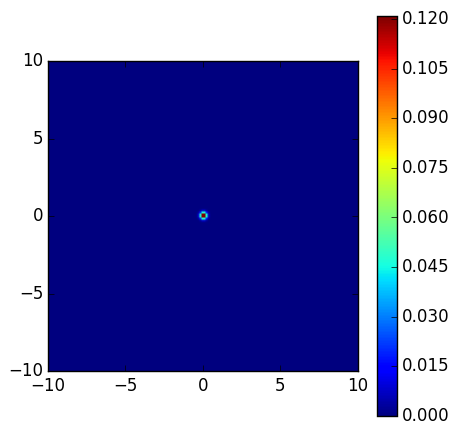

In [108]:
figure(figsize=(5,5))
imshow(Tmap, origin='l', extent= [-10,10,-10,10])
colorbar();

In [116]:
@pyimport numpy as np
Tmin = np.min(planck_map); Tmax = np.max(planck_map)

137299.59726333618

# Masking Foregounds + Point Sources

In [12]:
planck_map = copy(I_STOKES) * 1e6 # Converting it to mu K scale;
Tmin = -593.5015506111085 # mu K
Tmax = 137299.59726333618 # mu K

for i = 1:max(length(GalMap),length(PtMap))
    if (GalMap[i] == 0.) | (PtMap[i] == 0.)
        planck_map[i] = hp.UNSEEN
    end
end


# Function for picking up a degraded indice 
    (there are too many pixels in a image)
# Function for Stacking images

In [109]:
function pick_random_ind(index::Array{Int64,1},num::Int64)
    
    Ntot = length(index)       
    if (num == 0) | (num > Ntot)
        return index
    end

    j = 1
    ind = Array(Int64, 0)
    i = Int64( round(rand() * (Ntot-1)+1) )
    ind = vcat(ind,i)
    while j < num
        i = Int64( floor(1+ rand()*(Ntot-1)) )
        cnt = countnz(ind-i)
        #println(ind,ind-i,i)
        if cnt == j
            ind = vcat(ind,i)
            j   += 1
        end
    end

    return index[ind]
end
            
function StackImg(i0::Int64,i1::Int64,degrade=1)
    StackImage = zeros(Nsize, Nsize);   # [row, col]
    if degrade == 1
        println("degrading image is on")
    end
    println("   |> starting from $i0.")
    for i = i0:i1     # index of superclusters
        θc, ϕc = CoordSCluster[id_sc[i],:]   # Center Coord. of Supercluster
        i == 1 ? ist = 1: ist = 1 + sum(N_sc[1:i-1]) 
        percent = 20
        
        if (degrade == 1) & (Nsize*Nsize < N_sc[i])
            from = N_sc[i]
            to   = Nsize*Nsize
            println("   |> degrading img: $from to $to pixels")
            i_sc_pixel_new = pick_random_ind(i_sc_pixel[ist:ist+N_sc[i]],to)
            println("   |> degrading img: done")
            for j = 1:to
                if planck_map[i_sc_pixel_new[j]] > Tmin 
                    θ, ϕ = pixelfunc.pix2ang(NSIDE,i_sc_pixel_new[j])
                    if ϕ > ϕc + dtheta
                        ϕ -= 2pi
                    end
                    if ϕ < ϕc - dtheta
                        ϕ += 2pi
                    end
                    row_shift = Int64(round( (θ - θc) /res )) 
                    col_shift = Int64(round( (ϕ - ϕc) /res )) 
                    StackImage += ShiftArray(Tmap,row_shift, col_shift) * planck_map[i_sc_pixel_new[j]]               
                end
            end
            
            
        else     
            for j = ist:ist+N_sc[i]    # pixel index of a supercluster
                if planck_map[i_sc_pixel[j]] > Tmin # exlude the masked regions
                    θ, ϕ = pixelfunc.pix2ang(NSIDE,i_sc_pixel[j])
                    if ϕ > ϕc + dtheta
                        ϕ -= 2pi
                    end
                    if ϕ < ϕc - dtheta
                        ϕ += 2pi
                    end
                    row_shift = Int64(round( (θ - θc) /res )) 
                    col_shift = Int64(round( (ϕ - ϕc) /res )) 
                    StackImage += ShiftArray(Tmap,row_shift, col_shift) * planck_map[i_sc_pixel[j]]

                    #if Int64(round(100. * (j - ist) / N_sc[i])) > percent
                    #    println("   |> $percent % is done.")
                    #    percent += 20
                    #end
                end
            end
        end
        println("   |> No. $i is done.")
    end
    return StackImage / (i1 - i0 + 1)
end

StackImg (generic function with 2 methods)

In [110]:
@time StackImage = StackImg(1,49);

degrading image is on
   |> starting from 1.
   |> degrading img: 419520 to 22500 pixels
   |> degrading img: done
   |> No. 1 is done.
   |> degrading img: 408590 to 22500 pixels
   |> degrading img: done
   |> No. 2 is done.
   |> degrading img: 453180 to 22500 pixels
   |> degrading img: done
   |> No. 3 is done.
   |> degrading img: 385840 to 22500 pixels
   |> degrading img: done
   |> No. 4 is done.
   |> degrading img: 383804 to 22500 pixels
   |> degrading img: done
   |> No. 5 is done.
   |> degrading img: 453180 to 22500 pixels
   |> degrading img: done
   |> No. 6 is done.
   |> degrading img: 166662 to 22500 pixels
   |> degrading img: done
   |> No. 7 is done.
   |> degrading img: 373428 to 22500 pixels
   |> degrading img: done
   |> No. 8 is done.
   |> degrading img: 377392 to 22500 pixels
   |> degrading img: done
   |> No. 9 is done.
   |> degrading img: 349972 to 22500 pixels
   |> degrading img: done
   |> No. 10 is done.
   |> degrading img: 478660 to 22500 pixels


# Stacked (averaged) images of temperature (μK)

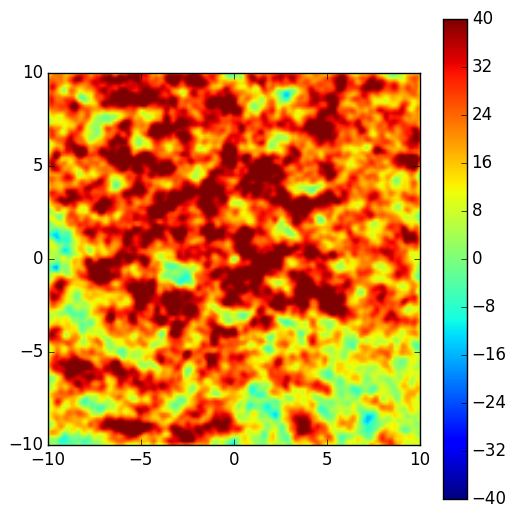

In [111]:
figure(figsize=(6,6))
imshow(StackImage, origin='l',vmin = -40, vmax = 40, extent= [-10,10,-10,10])
colorbar(); 